In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.stats.power as smp
from scipy.stats import t, norm, ttest_ind
import decimal
%matplotlib inline

In [127]:
def get_normal_sample(n,mean,sd):
    return np.random.normal(loc=mean,scale=sd,size=n)

In [172]:
smpl = get_normal_sample(30,13,2)
(smpl.mean() - 10)/smpl.std()

1.743736060175053

In [109]:
def conf_int_one_sample(x,alfa):
    mean = np.mean(x)
    se = np.std(x,ddof=1)/np.sqrt(len(x))
    return mean - t.ppf(1-alfa,df=len(x)-1)*se
    

In [191]:
def porownanie(pop_mean,smpl_mean,diff):
    podsumowanie = []
    moc = []
    a=0
    for j in range(10):
        samples_downs = []
        for i in range(1,501):
            i =i*0.001
            #size = (smp.ttest_power((smpl_mean-10)/np.std(2,ddof=1),i,alternative='larger'))
            #size = (smp.TTestIndPower().solve_power(effect_size = (2)/np.std(2,ddof=1) , power=0.80,alpha=i))
            size = smp.tt_ind_solve_power(effect_size=(smpl_mean-10)/2,alpha=i,power=0.8,alternative = "larger")
            size = int(size)
            sample = get_normal_sample(size,smpl_mean,2)
            down = conf_int_one_sample(sample,i)
            samples_downs.append(down)

        g1 = np.array(samples_downs) - pop_mean 
        sample_mean = smpl_mean - pop_mean
        cent_diff = diff - pop_mean
        
        diff_01 = len([i for i in g1 if i>0 and sample_mean>0])
        diff_non_01 = len([i for i in g1 if i>cent_diff and sample_mean>cent_diff])

        diff_02 = len([i for i in g1 if i<0 and sample_mean<0])
        diff_non_02 = len([i for i in g1 if i<cent_diff and sample_mean<cent_diff])

        diff_03 = len([i for i in g1 if i<0 and sample_mean>0])
        diff_non_03 = len([i for i in g1 if i<cent_diff and sample_mean>cent_diff])

        diff_04 = len([i for i in g1 if i>0 and sample_mean<0])
        diff_non_04 = len([i for i in g1 if i>cent_diff and sample_mean<cent_diff])

        podsumowanie.append([diff_01,diff_non_01,diff_02,diff_non_02,diff_03,diff_non_03,diff_04,diff_non_04])

    ile_wszystkich = sum([sum(i) for i in podsumowanie])/2

    for i in range(len(podsumowanie)):
        pop_dobrze = sum([i[0] for i in podsumowanie])
        nwd_dobrze = sum([i[2] for i in podsumowanie])
        nwd_zle = sum([i[4] for i in podsumowanie])
        pop_zle = sum([i[6] for i in podsumowanie])
        alt_pop_dobrze = sum([i[1] for i in podsumowanie])
        alt_nwd_dobrze = sum([i[3] for i in podsumowanie])
        alt_nwd_zle = sum([i[5] for i in podsumowanie])
        alt_pop_zle = sum([i[7] for i in podsumowanie])

    print(np.median(moc))
    print('test, ocena testu')

    print('pozytywny, dobrze', '\n' , 'dla klasycznego: ', pop_dobrze,'\n', 'dla alternatywnego: ', alt_pop_dobrze,' ')

    print('\n','pozytywny, źle', '\n' , 'dla klasycznego: ', pop_zle,'\n', 'dla alternatywnego: ', alt_pop_zle)

    print('\n','nie wiadomo, dobrze', '\n' , 'dla klasycznego: ', nwd_dobrze,'\n', 'dla alternatywnego: ', alt_nwd_dobrze)

    print('\n','nie wiadomo, źle', '\n' , 'dla klasycznego: ', nwd_zle,'\n', 'dla alternatywnego: ', alt_nwd_zle)

    print('\n','poprawnie', '\n' , 'dla klasycznego: ', (pop_dobrze+nwd_dobrze)/ile_wszystkich ,'\n', 'dla alternatywnego: ', (alt_pop_dobrze+alt_nwd_dobrze)/ile_wszystkich)


In [185]:
porownanie(10,11,12)

nan
test, ocena testu
pozytywny, dobrze 
 dla klasycznego:  4614 
 dla alternatywnego:  0  

 pozytywny, źle 
 dla klasycznego:  0 
 dla alternatywnego:  105

 nie wiadomo, dobrze 
 dla klasycznego:  0 
 dla alternatywnego:  4895

 nie wiadomo, źle 
 dla klasycznego:  386 
 dla alternatywnego:  0

 poprawnie 
 dla klasycznego:  0.9228 
 dla alternatywnego:  0.979


In [192]:
porownanie(10,13,12)

D:\Anaconda\lib\site-packages\statsmodels\stats\power.py:300: ConvergenceWarning: 
Failed to converge on a solution.

  warnings.warn(convergence_doc, ConvergenceWarning)
D:\Anaconda\lib\site-packages\statsmodels\stats\power.py:300: ConvergenceWarning: 
Failed to converge on a solution.

  warnings.warn(convergence_doc, ConvergenceWarning)
D:\Anaconda\lib\site-packages\statsmodels\stats\power.py:300: ConvergenceWarning: 
Failed to converge on a solution.

  warnings.warn(convergence_doc, ConvergenceWarning)
D:\Anaconda\lib\site-packages\statsmodels\stats\power.py:300: ConvergenceWarning: 
Failed to converge on a solution.

  warnings.warn(convergence_doc, ConvergenceWarning)
D:\Anaconda\lib\site-packages\statsmodels\stats\power.py:300: ConvergenceWarning: 
Failed to converge on a solution.

  warnings.warn(convergence_doc, ConvergenceWarning)
D:\Anaconda\lib\site-packages\statsmodels\stats\power.py:300: ConvergenceWarning: 
Failed to converge on a solution.

  warnings.warn(convergence

KeyboardInterrupt: 

In [106]:
porownanie(10,15,12)

0.9999999999982602
test, ocena testu
pozytywny, dobrze 
 dla klasycznego:  5000 
 dla alternatywnego:  5000  

 pozytywny, źle 
 dla klasycznego:  0 
 dla alternatywnego:  0

 nie wiadomo, dobrze 
 dla klasycznego:  0 
 dla alternatywnego:  0

 nie wiadomo, źle 
 dla klasycznego:  0 
 dla alternatywnego:  0

 poprawnie 
 dla klasycznego:  1.0 
 dla alternatywnego:  1.0


In [93]:
def conf_dist(sample_mean,diff):
    sample = get_normal_sample(70,sample_mean,2)
    downs = []
    ups= []
    alfas = []
    for i in range(1,501):
        alfa = i*0.01
        down = conf_int_one_sample(sample,alfa)
        downs.append(down)
        alfas.append(alfa)

    dwns = np.array(downs)-(diff-10)
    np.mean(sample)

    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(downs,alfas,color='blue')
    ax.plot(dwns,alfas,color='red')
    ax.axvline(x=diff)
    ax.set_xlabel('wartość dolnej granicy')
    ax.set_ylabel('alfa')

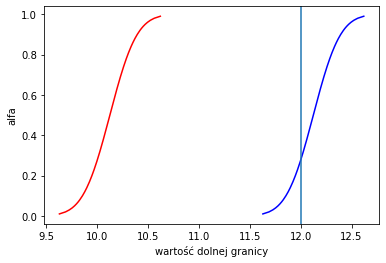

In [96]:
conf_dist(12,12)

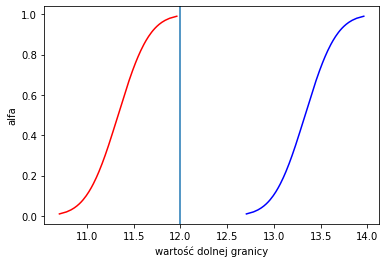

In [95]:
conf_dist(13,12)

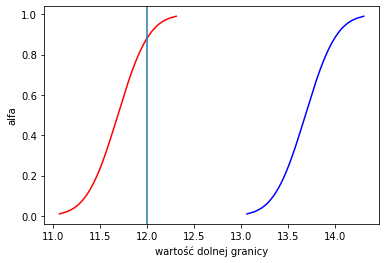

In [97]:
conf_dist(14,12)

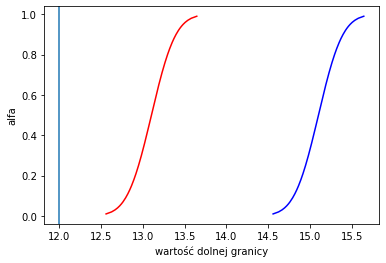

In [98]:
conf_dist(15,12)

In [200]:
 for i in range(1,501):
        i =i*0.001
        #size = (smp.ttest_power((smpl_mean-10)/np.std(2,ddof=1),i,alternative='larger'))
        #size = (smp.TTestIndPower().solve_power(effect_size = (2)/np.std(2,ddof=1) , power=0.80,alpha=i))
        size = smp.tt_ind_solve_power(effect_size=(4)/3,alpha=i,power=0.8,alternative = "larger")
        size = int(size)
        #sample = get_normal_sample(size,13,2)
        #down = conf_int_one_sample(sample,i)
        #samples_downs.append(down)
        print(size)

19
17
16
15
14
14
13
13
13
12
12
12
11
11
11
11
11
10
10
10
10
10
10
10
9
9
9
9
9
9
9
9
9
8
8
8
8
8
8
8
8
8
8
8
8
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10


D:\Anaconda\lib\site-packages\statsmodels\stats\power.py:300: ConvergenceWarning: 
Failed to converge on a solution.

  warnings.warn(convergence_doc, ConvergenceWarning)
D:\Anaconda\lib\site-packages\statsmodels\stats\power.py:300: ConvergenceWarning: 
Failed to converge on a solution.

  warnings.warn(convergence_doc, ConvergenceWarning)
D:\Anaconda\lib\site-packages\statsmodels\stats\power.py:300: ConvergenceWarning: 
Failed to converge on a solution.

  warnings.warn(convergence_doc, ConvergenceWarning)
D:\Anaconda\lib\site-packages\statsmodels\stats\power.py:300: ConvergenceWarning: 
Failed to converge on a solution.

  warnings.warn(convergence_doc, ConvergenceWarning)
D:\Anaconda\lib\site-packages\statsmodels\stats\power.py:300: ConvergenceWarning: 
Failed to converge on a solution.

  warnings.warn(convergence_doc, ConvergenceWarning)
D:\Anaconda\lib\site-packages\statsmodels\stats\power.py:300: ConvergenceWarning: 
Failed to converge on a solution.

  warnings.warn(convergence

10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10


D:\Anaconda\lib\site-packages\statsmodels\stats\power.py:300: ConvergenceWarning: 
Failed to converge on a solution.

  warnings.warn(convergence_doc, ConvergenceWarning)
D:\Anaconda\lib\site-packages\statsmodels\stats\power.py:300: ConvergenceWarning: 
Failed to converge on a solution.

  warnings.warn(convergence_doc, ConvergenceWarning)
D:\Anaconda\lib\site-packages\statsmodels\stats\power.py:300: ConvergenceWarning: 
Failed to converge on a solution.

  warnings.warn(convergence_doc, ConvergenceWarning)
D:\Anaconda\lib\site-packages\statsmodels\stats\power.py:300: ConvergenceWarning: 
Failed to converge on a solution.

  warnings.warn(convergence_doc, ConvergenceWarning)
D:\Anaconda\lib\site-packages\statsmodels\stats\power.py:300: ConvergenceWarning: 
Failed to converge on a solution.

  warnings.warn(convergence_doc, ConvergenceWarning)
D:\Anaconda\lib\site-packages\statsmodels\stats\power.py:300: ConvergenceWarning: 
Failed to converge on a solution.

  warnings.warn(convergence

10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10


D:\Anaconda\lib\site-packages\statsmodels\stats\power.py:300: ConvergenceWarning: 
Failed to converge on a solution.

  warnings.warn(convergence_doc, ConvergenceWarning)
D:\Anaconda\lib\site-packages\statsmodels\stats\power.py:300: ConvergenceWarning: 
Failed to converge on a solution.

  warnings.warn(convergence_doc, ConvergenceWarning)
D:\Anaconda\lib\site-packages\statsmodels\stats\power.py:300: ConvergenceWarning: 
Failed to converge on a solution.

  warnings.warn(convergence_doc, ConvergenceWarning)
D:\Anaconda\lib\site-packages\statsmodels\stats\power.py:300: ConvergenceWarning: 
Failed to converge on a solution.

  warnings.warn(convergence_doc, ConvergenceWarning)
D:\Anaconda\lib\site-packages\statsmodels\stats\power.py:300: ConvergenceWarning: 
Failed to converge on a solution.

  warnings.warn(convergence_doc, ConvergenceWarning)
D:\Anaconda\lib\site-packages\statsmodels\stats\power.py:300: ConvergenceWarning: 
Failed to converge on a solution.

  warnings.warn(convergence